## Focusing on the individuals representation
- PCA is about representing at best a high dimensional dataset into a smaller dimensional space
- this is done by preserving the distance between individuals
- we can judge the factorial representation by comparing distances between individuals in the factorial plane vs the total dimension

- the questions to ask is then:
	- 	what are the books that are best represented on the factorial plane
	- 	what are the books that have contributed the most to the factorial plane's construction

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plots_lib import plot_pca_scatter

In [226]:
column_name = ['title', 'author', 'listPrice', 'amazonPrice', 'cover', 'npages',
       'publisher', 'year', 'isbn', 'height', 'width', 'thick', 'weight',
       'F0','F1','F2','F3']

active_var = ['listPrice', 'amazonPrice','height','width']
PCs = ['F0','F1','F2','F3']

df = pd.read_csv('amazon-books-factorial.csv', index_col=0)

df_std = pd.read_csv('amazon-books-continuous-standardised.csv', index_col=0)
df_std = df_std[active_var]
df_factor = df[PCs]

lambdas = np.array(pd.read_csv('amazon-books-eigenvalues.csv', index_col=0))
print(lambdas.shape)
lambdas = lambdas.reshape((lambdas.shape[1],))
p = lambdas.shape[0]
df_factor

(1, 4)


,F0,F1,F2,F3
0,-0.756178,0.187501,-0.193435,0.232367
1,-0.132297,-0.028480,-0.327437,-0.254204
2,-1.328828,-0.229065,-0.823659,-0.404750
3,0.397787,-0.048851,-0.856741,-0.150462
4,0.491434,0.450040,0.858746,-0.215871
...,...,...,...,...
306,1.148293,-0.009474,-1.428200,-0.044950
307,1.887507,-0.433259,-0.100205,-0.332688
308,-0.708793,0.181422,-0.262093,-0.012958
309,10.450521,-0.968343,1.960616,0.626245


In [227]:
print(lambdas)
print(np.sum(lambdas))
assert np.round(np.sum(lambdas)) == p

print('share of inertia on axis 0 and 3', (np.sum(lambdas[[0,2]]) / np.sum(lambdas))*100, '%')

[2.62735722 0.04501923 0.80706016 0.50770166]
3.987138263665594
share of inertia on axis 0 and 3 86.13740351264443 %


### first lets analyse de representation of our individuals:
we use for that de squarred cosine wich is nothing more than the distance form the origin in a factorial axis normalised by the distance from the origin in the original data matrix
if the PCA is done well, the sum of the squarred cosine of one individual across all fatcorial axis should be equal to 1.
the squarred cosine is representative of the angle between the datapoint $z_i$ in the original space $R^n$ and the projection of the datapoint onto the factorial axis $F_{ki}$
$$
COS^2(z_i, F_k) = \frac{F_{ki}}{d^2(z_i)}
$$

In [228]:
Z = np.array(df_std)
d_squared = np.sum(df_std**2, axis=1)

F = np.array(df_factor)

factor_dist = F**2

cos2 = np.zeros_like(factor_dist)

for i in range(len(factor_dist)):
    cos2[i] = factor_dist[i] / d_squared[i]
    
print(cos2.shape)

# to check the validity of the cosine
assert np.all(np.round(np.sum(cos2, axis=1)) == 1.)



(311, 4)


In [229]:
cos2_label = [f'COS2_{i}' for i in range(cos2.shape[1])]

cos2_df = pd.DataFrame(cos2, columns=cos2_label)

df = pd.concat([df, cos2_df], axis=1)

In [230]:
df.head()

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,...,thick,weight,F0,F1,F2,F3,COS2_0,COS2_1,COS2_2,COS2_3
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010,1605506249,7.8,...,0.8,11.2,-0.756178,0.187501,-0.193435,0.232367,0.818768,0.050341,0.053577,0.077314
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008,1416564195,8.4,...,0.7,7.2,-0.132297,-0.028480,-0.327437,-0.254204,0.092047,0.004266,0.563850,0.339837
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995,486285537,8.3,...,0.3,4.0,-1.328828,-0.229065,-0.823659,-0.404750,0.663706,0.019722,0.254996,0.061576
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008,61564893,8.8,...,1.6,28.8,0.397787,-0.048851,-0.856741,-0.150462,0.172507,0.002602,0.800211,0.024681
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011,307265722,8.0,...,1.4,22.4,0.491434,0.450040,0.858746,-0.215871,0.196653,0.164919,0.600482,0.037946


##### The best represented books on the two first factorial axis:
- first impression: it feels like a tradeof, either the point is well represented on the first axis and not on the second and vice versa.
- this seem logical, since they add up to one.

In [231]:
result = df[['COS2_0', 'COS2_2']].sum(axis=1)
sorted_indices = result.sort_values(ascending=False).index
sorted_by_cos = df.loc[sorted_indices]

sorted_by_cos.iloc[0:10]

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,...,thick,weight,F0,F1,F2,F3,COS2_0,COS2_1,COS2_2,COS2_3
128,Matched,"Condie, Ally",17.99,11.24,H,384.0,Dutton Juvenile,2010,525423648,9.0,...,1.4,16.0,0.806252,0.015999,-1.171191,0.026989,0.321371,0.000127,0.678142,0.000360
306,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004,60572345,9.3,...,1.1,24.0,1.148293,-0.009474,-1.428200,-0.044950,0.392382,0.000027,0.606990,0.000601
124,Madeline,Ludwig Bemelmans,17.99,10.58,H,54.0,The Viking Press,1967,670445806,12.1,...,0.5,17.6,3.752730,-0.175788,-5.050063,-0.069935,0.355434,0.000780,0.643662,0.000123
17,A Raisin In The Sun,Lorraine Hansberry,7.50,5.87,P,160.0,Vintage,2004,679755330,6.7,...,0.6,4.0,-2.222787,-0.055265,1.299200,-0.071902,0.744438,0.000460,0.254323,0.000779
266,The Pursuit of History,John Tosh,34.80,24.90,P,368.0,Longman,2010,582894123,9.4,...,0.9,19.2,2.529276,0.086552,-0.574665,-0.070586,0.949152,0.001111,0.048997,0.000739
16,A Painted House,Grisham,15.00,10.20,P,384.0,Delta,2004,385337930,8.0,...,0.8,11.2,-0.381790,-0.006876,0.002154,-0.019085,0.997153,0.000323,0.000032,0.002492
269,The Secret Garden,Frances Hodgson Burnett,3.95,3.95,P,288.0,Signet Classics,2003,451528832,6.7,...,1.0,5.6,-2.466202,-0.133673,1.115573,-0.065585,0.827636,0.002431,0.169347,0.000585
156,Playing for Pizza,Grisham,15.00,9.98,P,272.0,Bantam,2011,385344007,7.8,...,0.6,7.2,-0.594384,0.021788,0.254187,-0.029151,0.842721,0.001132,0.154119,0.002027
202,The Awakening,Chopin,14.10,11.99,H,116.0,Perfection Learning,1982,780735919,6.8,...,0.7,4.8,-1.444468,-0.075864,1.485105,0.090193,0.484563,0.001337,0.512211,0.001889
210,The Classic Slave Narratives-paperback,Henry Gates,7.95,7.95,H,688.0,Signet Classics,2002,451528247,6.6,...,1.7,11.2,-2.153865,-0.150393,1.463142,0.006207,0.681967,0.003325,0.314702,0.000006


In [232]:
bad_result = result[result < 0.20]
best_result = result[result > 0.90]
bad_represented = df.loc[bad_result.index]
best_represented = df.loc[best_result.index]

print('lens -->', len(bad_represented), len(best_represented))

lens --> 14 158


### We have 20 books that are represented at less than 20% by the two first axis, lets check if there is a pattern

In [233]:
bad_represented[['title', 'author', 'listPrice', 'amazonPrice', 'cover', 'npages',
       'publisher', 'year', 'isbn', 'height', 'width', 'thick', 'weight']]

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,width,thick,weight
50,Catcher in the Rye,JD Salinger,13.99,8.38,P,288.0,Back Bay Books,2001,316769177,5.2,8.0,0.9,5.6
76,Final Harvest: Poems,Dickinson,14.99,10.19,H,352.0,Back Bay Books,1964,316184152,5.6,8.2,1.0,10.4
86,God in the Dock: Essays on Theology and Ethics,Lewis,18.00,12.24,P,346.0,William B. Eerdmans Publishing Company,1994,802808689,8.5,5.4,0.8,14.1
92,Holes,Louis Sachar,18.00,12.24,H,272.0,"Farrar, Straus and Giroux",2008,374332665,8.1,5.6,0.9,12.8
135,Moll Flanders (Norton Critical Editions),Daniel Defoe,13.29,13.29,P,544.0,W. W. Norton & Company,2004,393978621,8.5,5.2,1.0,28.8
137,Nathaniel Hawthorne's Tales,Hawthorne,13.83,13.83,H,480.0,W. W. Norton & Co.,1987,393954269,8.5,5.2,1.0,17.6
187,Strong Men Armed,Robert Leckie,17.95,12.08,P,600.0,DA CAPO PRESS,2010,306818876,8.2,5.5,1.6,20.8
193,Thank You Notes,Jimmy Fallon,12.00,7.51,P,176.0,Grand Central Publishing,2011,892967412,5.2,7.2,0.5,7.8
195,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,11.99,7.70,P,288.0,"Little, Brown Books for Young Readers",2009,316013692,5.5,8.2,0.8,9.6
199,The Art of Racing in the Rain,Garth Stein,14.99,8.43,P,336.0,Harper Paperbacks,2009,61537969,7.4,6.0,0.8,8.8


In [234]:
from summaries import continuous_variable_summary 

bad_rep_summary = continuous_variable_summary(bad_represented, ['listPrice', 'amazonPrice', 'npages', 'height', 'width', 'thick', 'weight'])
bad_rep_summary


,mean,median,variance,std_dev,min,max
listPrice,15.497143,14.475,11.418345,3.379104,11.99,24.99
amazonPrice,10.940000,11.380,6.689862,2.586477,7.51,14.69
npages,348.142857,312.000,13820.593407,117.561020,176.00,600.00
height,6.900000,7.150,2.149231,1.466026,5.10,8.50
width,6.621429,6.050,1.786429,1.336573,5.20,8.50
thick,0.935714,0.900,0.064011,0.253004,0.50,1.60
weight,14.192857,11.600,48.357637,6.953966,5.60,28.80


In [235]:
best_rep_summary = continuous_variable_summary(best_represented, ['listPrice', 'amazonPrice', 'npages', 'height', 'width', 'thick', 'weight'])
best_rep_summary

,mean,median,variance,std_dev,min,max
listPrice,19.971835,15.000,317.109967,17.807582,1.50,139.95
amazonPrice,14.474494,10.345,247.422243,15.729661,0.77,139.95
npages,296.601266,289.000,24906.967387,157.819414,24.00,896.00
height,8.239873,8.000,1.003559,1.001778,5.70,12.10
width,5.597468,5.350,0.885471,0.940995,4.10,9.20
thick,0.820253,0.800,0.118695,0.344522,0.20,1.80
weight,11.804430,10.400,49.903866,7.064267,1.20,32.00


### Now lets check the contributions of our individuals:

- contribution is the metric that allow you to appreciate how much a specific individual participate in the construction of a factorial axis.
- it is the share of inertia that it contain with respect to the total inertia of the axis
$$
CONTR(z_i, F_k) = \frac{p_i*F_{ki}}{\lambda_k}
$$
where $p_i$ equals the weight, in our case $1/n$

In [236]:
n, p = F.shape[0], F.shape[1]
CONTR = np.zeros_like(F)

CONTR_label = []
for ax in range(p):
    CONTR_label.append(f'CONTR_{ax}')
    CONTR[:, ax] = ((F[:, ax]**2 * (1/n))/lambdas[ax]) * 100

contr_df = pd.DataFrame(CONTR, columns=CONTR_label)

# print('checking: ')
# for i in range(len(CONTR_label)):
# 	print(contr_df[f'CONTR_{i}'].sum())


df = pd.concat([df, contr_df], axis=1)
df

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,...,F2,F3,COS2_0,COS2_1,COS2_2,COS2_3,CONTR_0,CONTR_1,CONTR_2,CONTR_3
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010,1605506249,7.8,...,-0.193435,0.232367,0.818768,0.050341,0.053577,0.077314,0.069979,0.251100,0.014907,0.034196
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008,1416564195,8.4,...,-0.327437,-0.254204,0.092047,0.004266,0.563850,0.339837,0.002142,0.005793,0.042716,0.040926
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995,486285537,8.3,...,-0.823659,-0.404750,0.663706,0.019722,0.254996,0.061576,0.216101,0.374766,0.270289,0.103754
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008,61564893,8.8,...,-0.856741,-0.150462,0.172507,0.002602,0.800211,0.024681,0.019365,0.017045,0.292437,0.014338
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011,307265722,8.0,...,0.858746,-0.215871,0.196653,0.164919,0.600482,0.037946,0.029556,1.446582,0.293808,0.029514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004,60572345,9.3,...,-1.428200,-0.044950,0.392382,0.000027,0.606990,0.000601,0.161371,0.000641,0.812666,0.001280
307,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011,1429233443,9.1,...,-0.100205,-0.332688,0.920324,0.048491,0.002594,0.028592,0.436011,1.340715,0.004001,0.070098
308,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005,031233446X,8.0,...,-0.262093,-0.012958,0.831544,0.054479,0.113699,0.000278,0.061484,0.235084,0.027368,0.000106
309,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010,393934942,10.7,...,1.960616,0.626245,0.954769,0.008197,0.033605,0.003429,13.365845,6.697303,1.531507,0.248381


##### What are the most contributive individuals, are there any pattern ? 

In [237]:
sort0 = df.sort_values(by='CONTR_0', ascending=False, inplace=False)
sort1 = df.sort_values(by='CONTR_2', ascending=False, inplace=False)



In [238]:
sort0['weight_gram'] = sort0['weight']* 28.35
sort1['weight_gram'] = sort1['weight']* 28.35

best_repr_0 = sort0[['title', 'cover'] + active_var + ['weight_gram']].iloc[0:20]
best_repr_1 = sort1[['title', 'cover'] + active_var + ['weight_gram']].iloc[0:20]
sum0 = continuous_variable_summary(best_repr_0, active_var)
sum1 = continuous_variable_summary(best_repr_1, active_var)


#### According to our variables analysis, we can see that the books that contribute the most to the creation of the first factorial plane are the heaviest book, with the most pages and thus the biggest thickness

#### the height and widht of those books are pretty close to the mean of the all dataset

In [239]:
sum0

,mean,median,variance,std_dev,min,max
listPrice,45.5900,35.850,1496.382684,38.683106,3.95,139.95
amazonPrice,37.9465,30.895,1238.367298,35.190443,3.95,139.95
height,8.8500,9.100,3.410000,1.846619,5.70,12.10
width,6.5150,6.350,2.877132,1.696211,4.10,9.20


In [240]:
sum1

,mean,median,variance,std_dev,min,max
listPrice,35.250,16.045,1760.455053,41.957777,4.99,139.95
amazonPrice,29.164,10.730,1415.733320,37.626232,4.99,139.95
height,8.755,9.100,3.824711,1.955687,5.70,12.10
width,6.760,7.250,3.535158,1.880202,4.10,9.30


#### I note that the individual that contributed the most is not especially the best represented !!
- how to explain that ?

(311, 4) (311,)


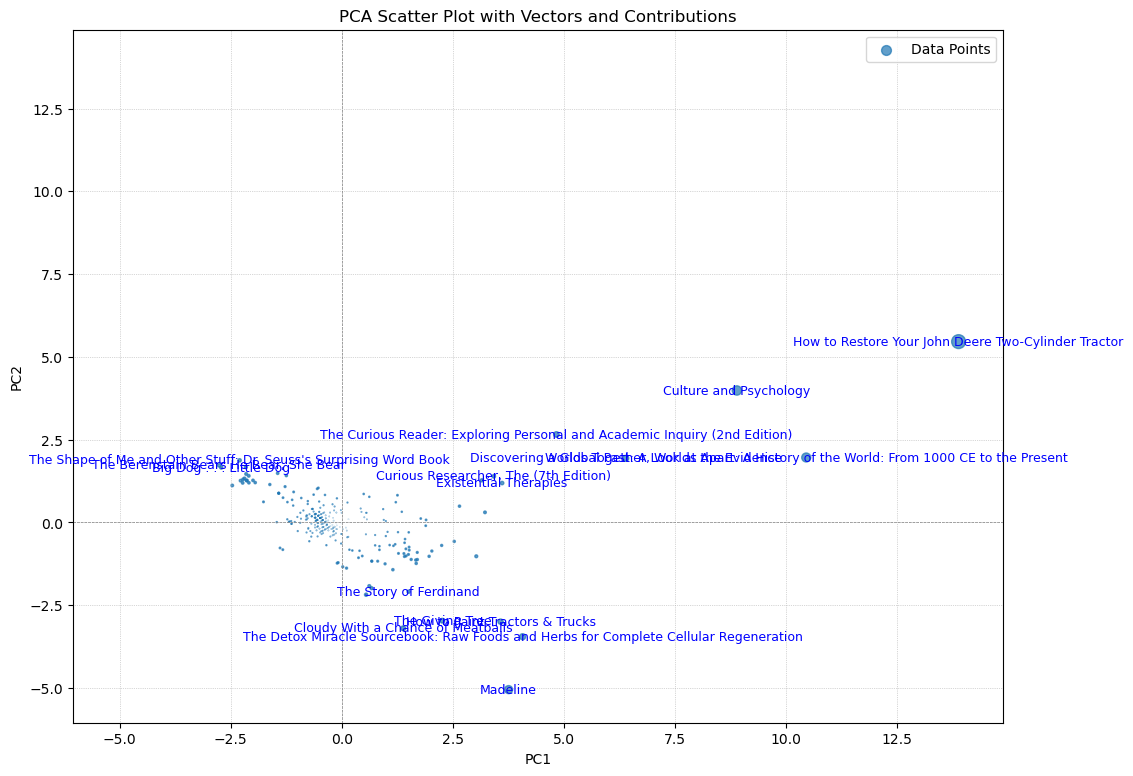

In [241]:
F = np.array(df[PCs])
contr = np.array(df[['CONTR_2', 'CONTR_0']].sum(axis=1))
print(F.shape, contr.shape)

plot_pca_scatter(F[: ,[0, 2]], contribution=contr, data_label=list(df['title']), display_treshold=5, figsize=(12, 9))

In [242]:
best_repr_0

,title,cover,listPrice,amazonPrice,height,width,weight_gram
97,How to Restore Your John Deere Two-Cylinder Tr...,P,139.95,139.95,10.6,8.2,635.040
309,"Worlds Together, Worlds Apart: A History of th...",P,97.50,97.50,10.7,8.9,408.240
57,Culture and Psychology,P,114.95,83.04,9.1,7.3,816.480
62,Discovering a Global Past: A Look at the Evidence,P,86.95,54.61,9.1,7.4,657.720
215,The Curious Reader: Exploring Personal and Aca...,P,70.80,55.75,8.9,5.8,544.320
218,The Detox Miracle Sourcebook: Raw Foods and He...,P,30.00,20.00,11.0,9.0,907.200
124,Madeline,H,17.99,10.58,12.1,9.2,498.960
71,Existential Therapies,P,53.95,39.92,9.1,6.1,317.520
96,How to Paint Tractors & Trucks,P,27.95,19.99,10.8,8.4,498.960
58,"Curious Researcher, The (7th Edition)",P,48.20,44.32,8.9,6.0,408.240


In [243]:
best_repr_1

,title,cover,listPrice,amazonPrice,height,width,weight_gram
97,How to Restore Your John Deere Two-Cylinder Tr...,P,139.95,139.95,10.6,8.2,635.040
124,Madeline,H,17.99,10.58,12.1,9.2,498.960
57,Culture and Psychology,P,114.95,83.04,9.1,7.3,816.480
218,The Detox Miracle Sourcebook: Raw Foods and He...,P,30.00,20.00,11.0,9.0,907.200
54,Cloudy With a Chance of Meatballs,P,6.99,6.99,8.5,9.3,45.360
96,How to Paint Tractors & Trucks,P,27.95,19.99,10.8,8.4,498.960
227,The Giving Tree,H,18.99,11.16,10.3,7.9,453.600
215,The Curious Reader: Exploring Personal and Aca...,P,70.80,55.75,8.9,5.8,544.320
189,Surviving Hitler: A Boy in the Nazi Death Camps,P,6.99,6.99,9.0,7.2,226.800
278,The Story of Ferdinand,H,17.99,10.88,9.4,7.4,408.240
